In [1]:
import pandas as pd

# Читаем parquet-файл
df = pd.read_parquet('nyc_taxi_weather_merged.parquet')

# Сохраняем в CSV (без индекса)
df.to_csv('output_file.csv', index=False)

print("Готово: output_file.csv")

/Users/yulialebedeva/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/yulialebedeva/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Готово: output_file.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузка данных
df = pd.read_csv('output_file.csv')
print("Колонки в датасете:", df.columns.tolist())
print("\nПервые 5 строк:")
print(df.head())
print(df.shape)

Колонки в датасете: ['pickup_location_id', 'pickup_date', 'pickup_hour', 'trip_time', 'sales_tax', 'congestion_surcharge', 'driver_pay', 'cbd_congestion_fee', 'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'total_amount', 'dropoff_location_id', 'ride_count', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WT01', 'WT03']

Первые 5 строк:
   pickup_location_id pickup_date  pickup_hour  trip_time  sales_tax  \
0                 1.0  2022-01-01            4        NaN        NaN   
1                 1.0  2022-01-01            5        NaN        NaN   
2                 1.0  2022-01-01            7        NaN        NaN   
3                 1.0  2022-01-01           10        NaN        NaN   
4                 1.0  2022-01-01           11        NaN        NaN   

   congestion_surcharge  driver_pay  cbd_congestion_fee  passenger_count  \
0                   0.0         NaN                 NaN              3.0   
1                   0.0         

In [3]:
df.describe()

,pickup_location_id,pickup_hour,trip_time,sales_tax,congestion_surcharge,driver_pay,cbd_congestion_fee,passenger_count,trip_distance,RatecodeID,...,dropoff_location_id,ride_count,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WT01,WT03
count,731727.000000,731727.000000,368645.000000,368645.000000,611287.000000,368645.000000,572981.000000,406646.000000,539524.000000,406646.000000,...,730909.000000,731727.000000,634532.000000,634532.000000,634532.000000,634532.000000,634532.000000,634532.000000,205778.0,30558.0
mean,135.980493,11.852963,1075.012252,2.117467,0.898329,19.350154,0.286056,1.252717,33.594006,20.264430,...,141.289651,81.282772,2.941817,2.725813,1.797397,4.169372,10.543710,2.376198,1.0,1.0
std,76.386939,6.690104,286.764673,0.725290,1.053914,6.360370,0.404826,0.461785,1526.941121,36.873328,...,40.554882,135.051656,1.038012,7.196480,8.272177,13.437472,8.134121,5.983947,0.0,0.0
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,1.300000,0.000000,0.000000,0.000000,-7.100000,-12.100000,1.0,1.0
25%,70.000000,6.000000,906.917241,1.698049,0.000000,15.861475,0.000000,1.000000,2.117528,1.000000,...,120.036585,4.000000,2.200000,0.000000,0.000000,0.000000,3.900000,-2.100000,1.0,1.0
50%,138.000000,12.000000,1043.865385,1.970548,0.248418,18.123241,0.083333,1.111111,3.228333,1.046729,...,144.785714,26.000000,2.800000,0.000000,0.000000,0.000000,10.000000,2.200000,1.0,1.0
75%,204.000000,18.000000,1197.365297,2.363333,2.329852,21.268214,0.389189,1.347826,5.700000,5.000000,...,163.449102,105.000000,3.700000,0.800000,0.000000,0.000000,16.100000,6.100000,1.0,1.0
max,265.000000,23.000000,7489.500000,37.125000,2.750000,266.805000,1.500000,9.000000,259777.570000,99.000000,...,265.000000,2289.000000,6.400000,43.400000,76.000000,80.000000,29.400000,15.600000,1.0,1.0


In [4]:
# 2. Проверка дубликатов
dup_count = df.duplicated().sum()
print(f"\nКоличество дубликатов: {dup_count}")

# 3. Проверка полностью пустых строк
empty_count = df.isna().all(axis=1).sum()
print(f"Количество полностью пустых строк: {empty_count}")


Количество дубликатов: 0
Количество полностью пустых строк: 0


In [5]:
# 4. Анализ выбросов (IQR) для числовых признаков
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("\nЧисловые колонки:", numeric_cols)

outlier_summary = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    outlier_summary[col] = len(outliers)
    print(f"\n{col}: {len(outliers)} выбросов (ниже {lower:.2f} или выше {upper:.2f})")



Числовые колонки: ['pickup_location_id', 'pickup_hour', 'trip_time', 'sales_tax', 'congestion_surcharge', 'driver_pay', 'cbd_congestion_fee', 'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra', 'total_amount', 'dropoff_location_id', 'ride_count', 'AWND', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'WT01', 'WT03']

pickup_location_id: 0 выбросов (ниже -131.00 или выше 405.00)

pickup_hour: 0 выбросов (ниже -12.00 или выше 36.00)

trip_time: 14179 выбросов (ниже 471.25 или выше 1633.04)

sales_tax: 18883 выбросов (ниже 0.70 или выше 3.36)

congestion_surcharge: 0 выбросов (ниже -3.49 или выше 5.82)

driver_pay: 22142 выбросов (ниже 7.75 или выше 29.38)

cbd_congestion_fee: 55919 выбросов (ниже -0.58 или выше 0.97)

passenger_count: 27750 выбросов (ниже 0.48 или выше 1.87)

trip_distance: 36923 выбросов (ниже -3.26 или выше 11.07)

RatecodeID: 92465 выбросов (ниже -5.00 или выше 11.00)

payment_type: 3374 выбросов (ниже -1.29 или выше 2.54)

fare_amount:

In [6]:
# 5. Удаление выбросов
mask = np.zeros(len(df), dtype=bool)
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    mask |= (df[col] < lower) | (df[col] > upper)

df_clean = df.loc[~mask].reset_index(drop=True)
print(f"\nРазмер до очистки: {df.shape}, после очистки: {df_clean.shape}")


Размер до очистки: (731727, 25), после очистки: (326843, 25)


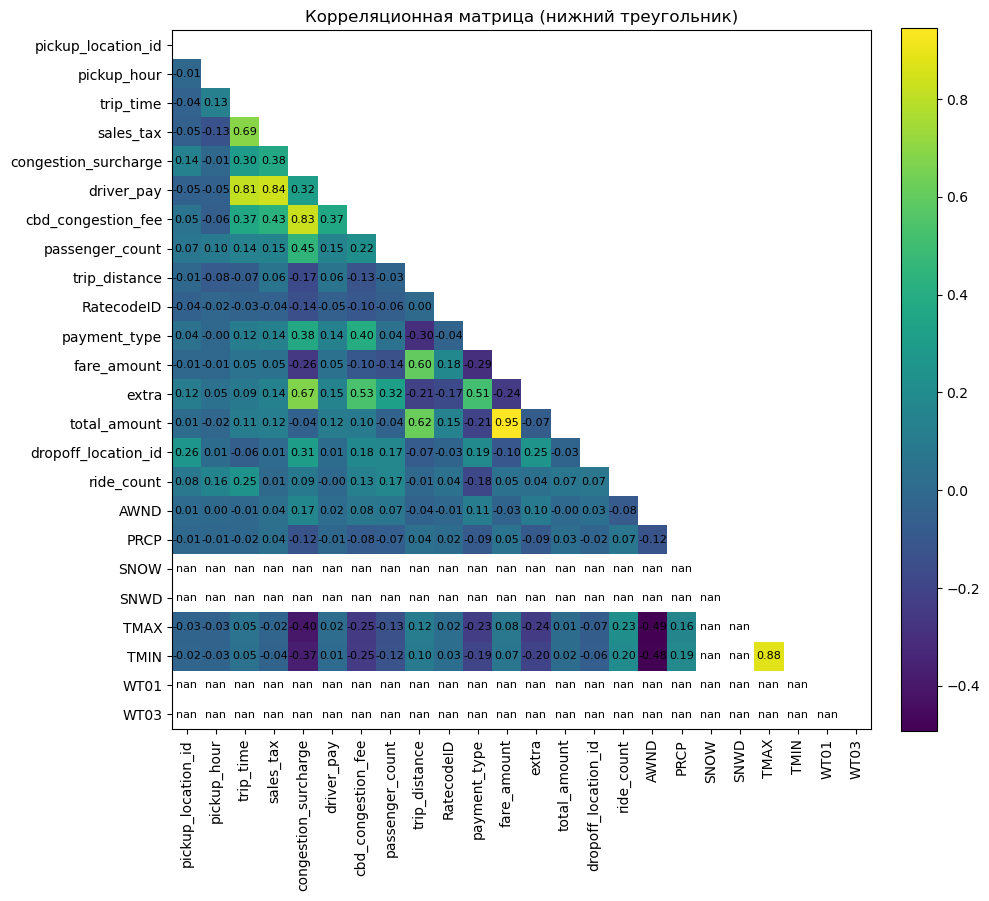

In [13]:
# Предполагается, что df_clean уже определён и содержит очищенные данные
# Вычисляем корреляционную матрицу
numeric_cols = df_clean.select_dtypes(include=[np.number]).columns

corr = df_clean[numeric_cols].corr()

# Создаём маску для верхнего треугольника
mask = np.triu(np.ones_like(corr, dtype=bool))

# Применяем маску
masked_corr = corr.mask(mask)

# Рисуем тепловую карту
fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(masked_corr, interpolation='none')
ax.set_aspect('equal')  # Клетки квадратные

# Настраиваем метки осей
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)

# Аннотации значений в ячейках
for i in range(len(corr)):
    for j in range(len(corr)):
        if not mask[i, j]:
            ax.text(j, i, f"{corr.iat[i, j]:.2f}", ha='center', va='center', fontsize=8)

# Добавляем цветовую шкалу
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.title('Корреляционная матрица (нижний треугольник)')
plt.tight_layout()
plt.show()

In [14]:
# Сохраним очищенные данные в CSV
df_clean.to_csv('processed_output.csv', index=False)

# Опционально — можно сохранить в Parquet для более компактного хранения
df_clean.to_parquet('processed_output.parquet', index=False)